In [50]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Flight_Booking (1).csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df = df.drop(columns = ['Unnamed: 0'])

In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.shape

(300153, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

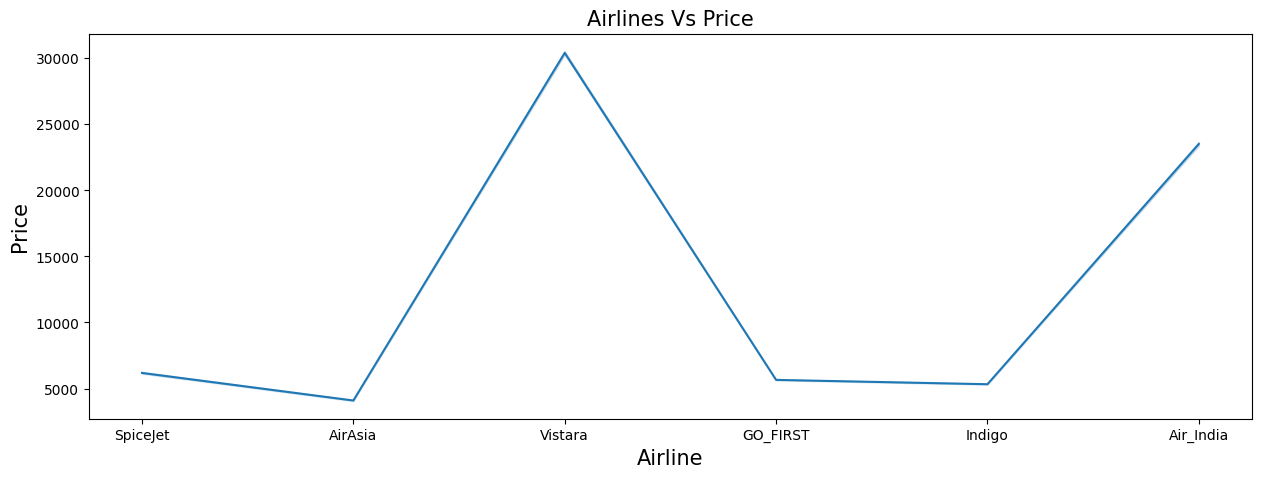

In [10]:
plt.figure(figsize = (15,5))
sns.lineplot(x = df['airline'], y = df['price'])
plt.title("Airlines Vs Price", fontsize = 15)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

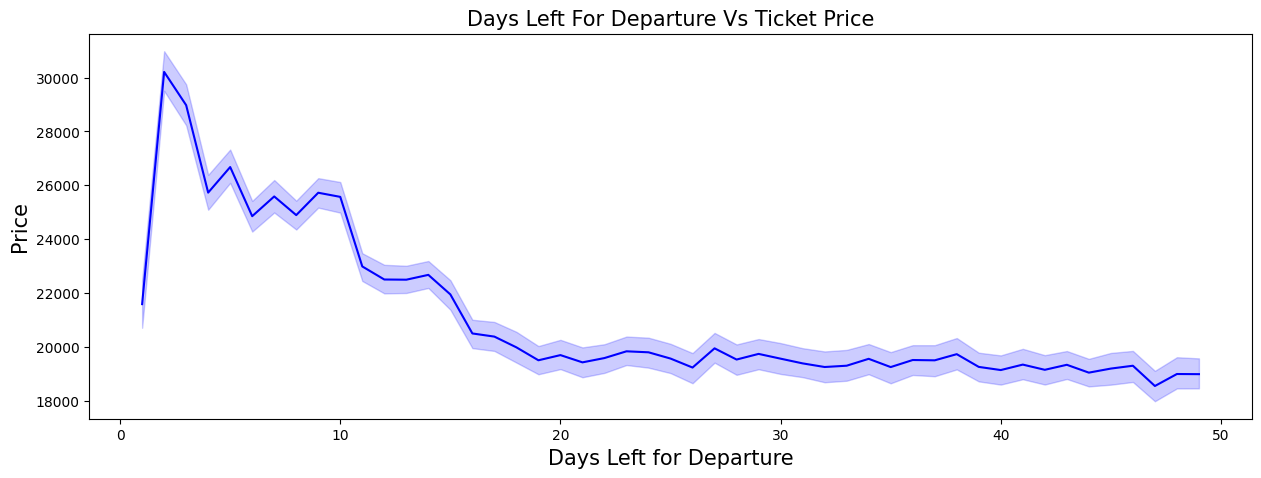

In [11]:
plt.figure(figsize = (15,5))
sns.lineplot(data = df, x = df['days_left'], y = df['price'], color = 'blue')
plt.title("Days Left For Departure Vs Ticket Price", fontsize = 15)
plt.xlabel('Days Left for Departure', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

In [12]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

<Axes: xlabel='airline', ylabel='price'>

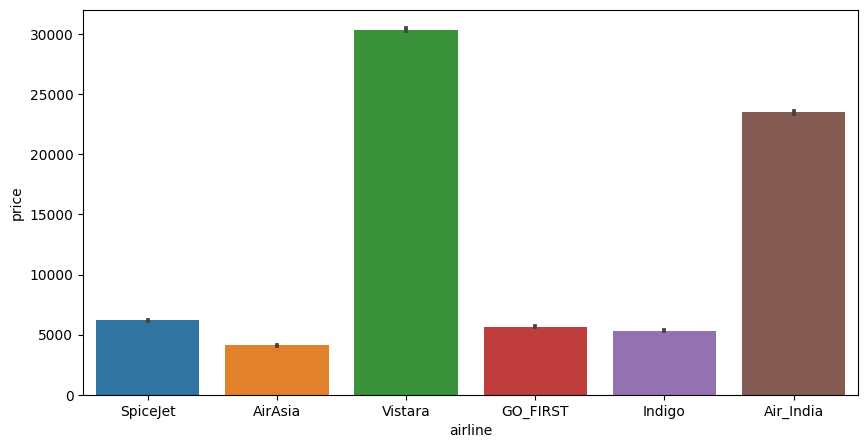

In [13]:
plt.figure(figsize = (10,5))
sns.barplot(x='airline', y = 'price', data = df)

<Axes: xlabel='class', ylabel='price'>

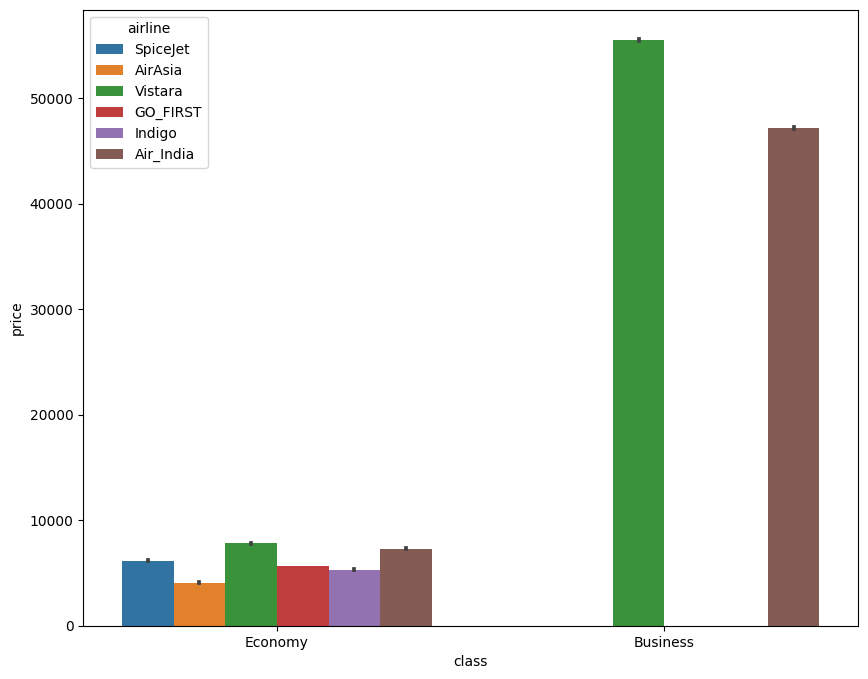

In [14]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'class', y = 'price', data = df, hue = 'airline')

In [15]:
# What is the average price of all airlines from Delhi to Mumbai?

df1 = df.loc[(df['source_city'] == 'Delhi') & (df['destination_city'] == 'Mumbai')]

In [16]:
df1.describe()

,duration,days_left,price
count,15289.000000,15289.000000,15289.000000
mean,10.367774,25.828373,19355.829812
std,7.518482,13.675568,19777.253580
min,2.000000,1.000000,2281.000000
25%,3.830000,14.000000,4381.000000
50%,8.250000,26.000000,7262.000000
75%,15.170000,38.000000,36712.000000
max,30.080000,49.000000,95657.000000


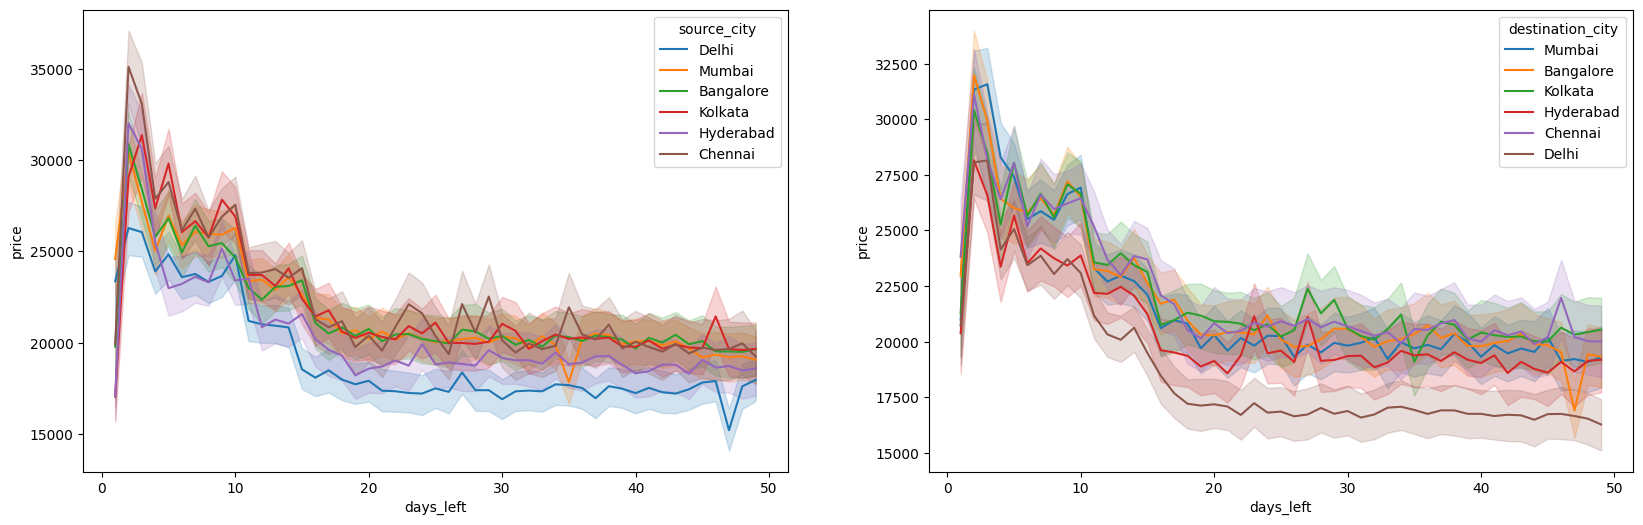

In [17]:
fig,ax = plt.subplots(1,2,figsize = (20,6))
sns.lineplot (x = 'days_left', y = 'price', data = df, hue = 'source_city', ax = ax[0])
sns.lineplot (x = 'days_left', y = 'price', data = df, hue = 'destination_city', ax = ax[1])
plt.show()

<Axes: xlabel='days_left', ylabel='price'>

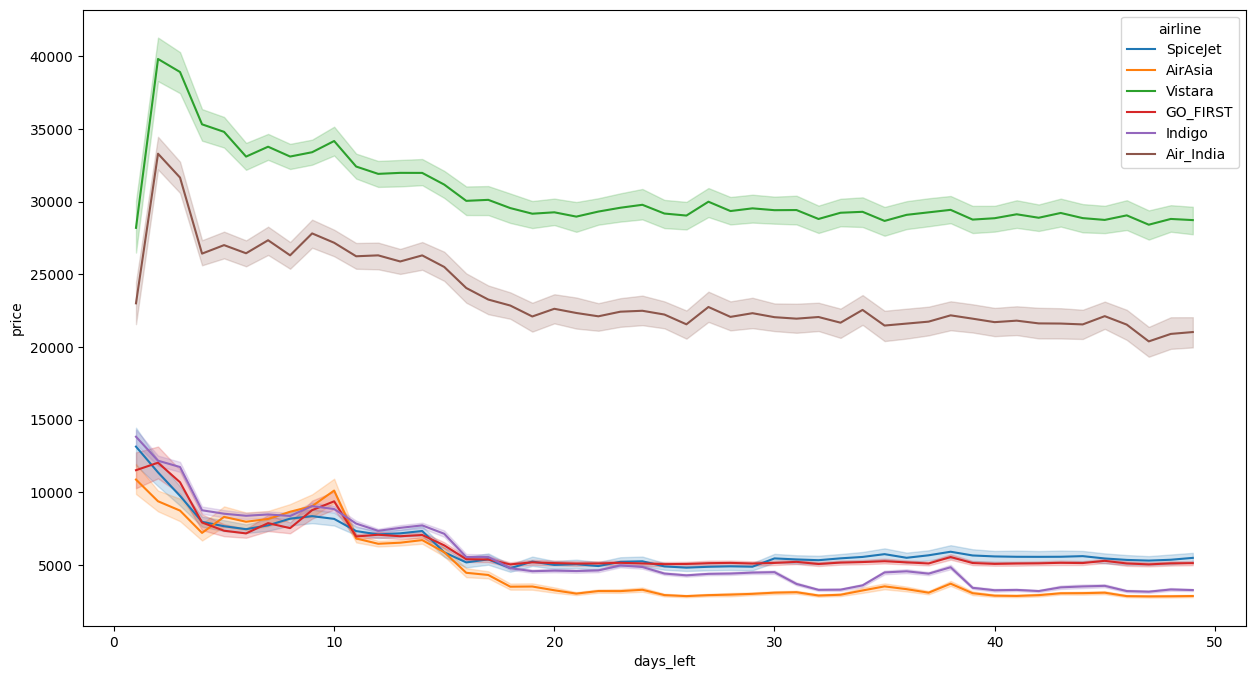

In [18]:
plt.figure (figsize = (15,8))
sns.lineplot(x = 'days_left', y = 'price', data = df, hue = 'airline')

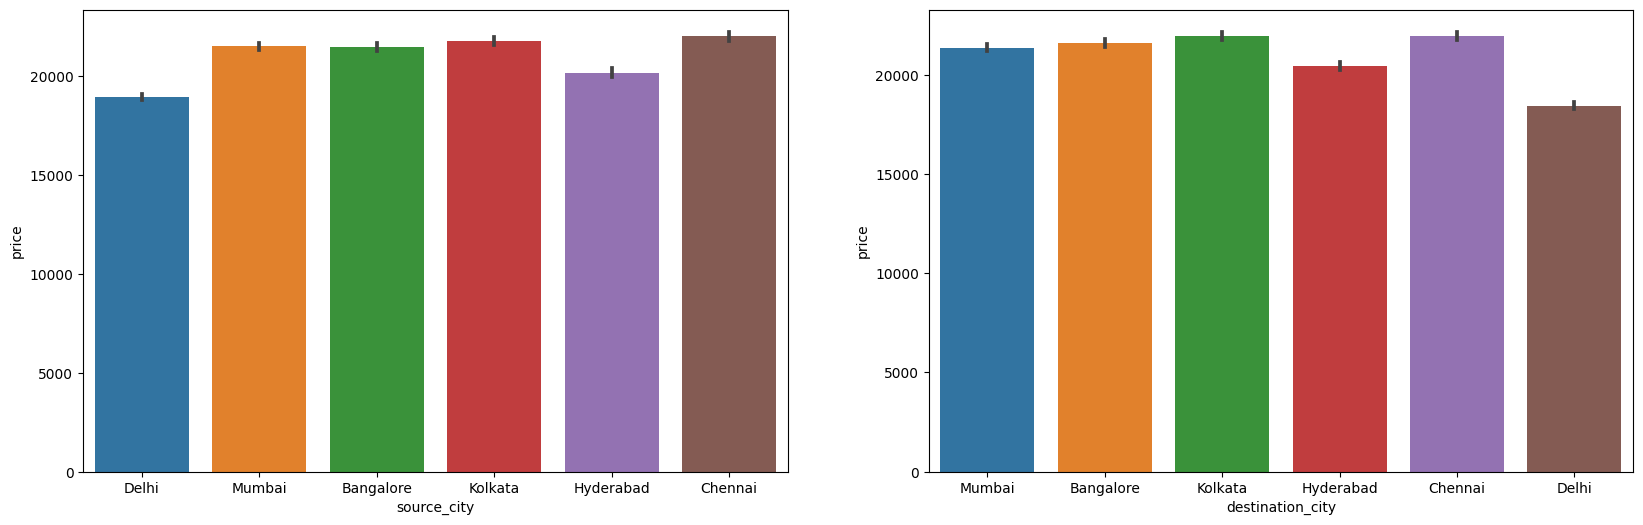

In [19]:
fig,ax = plt.subplots(1,2,figsize = (20,6))
sns.barplot (y = 'price', data = df, x = 'source_city', ax = ax[0])
sns.barplot (y = 'price', data = df, x = 'destination_city', ax = ax[1])
plt.show()

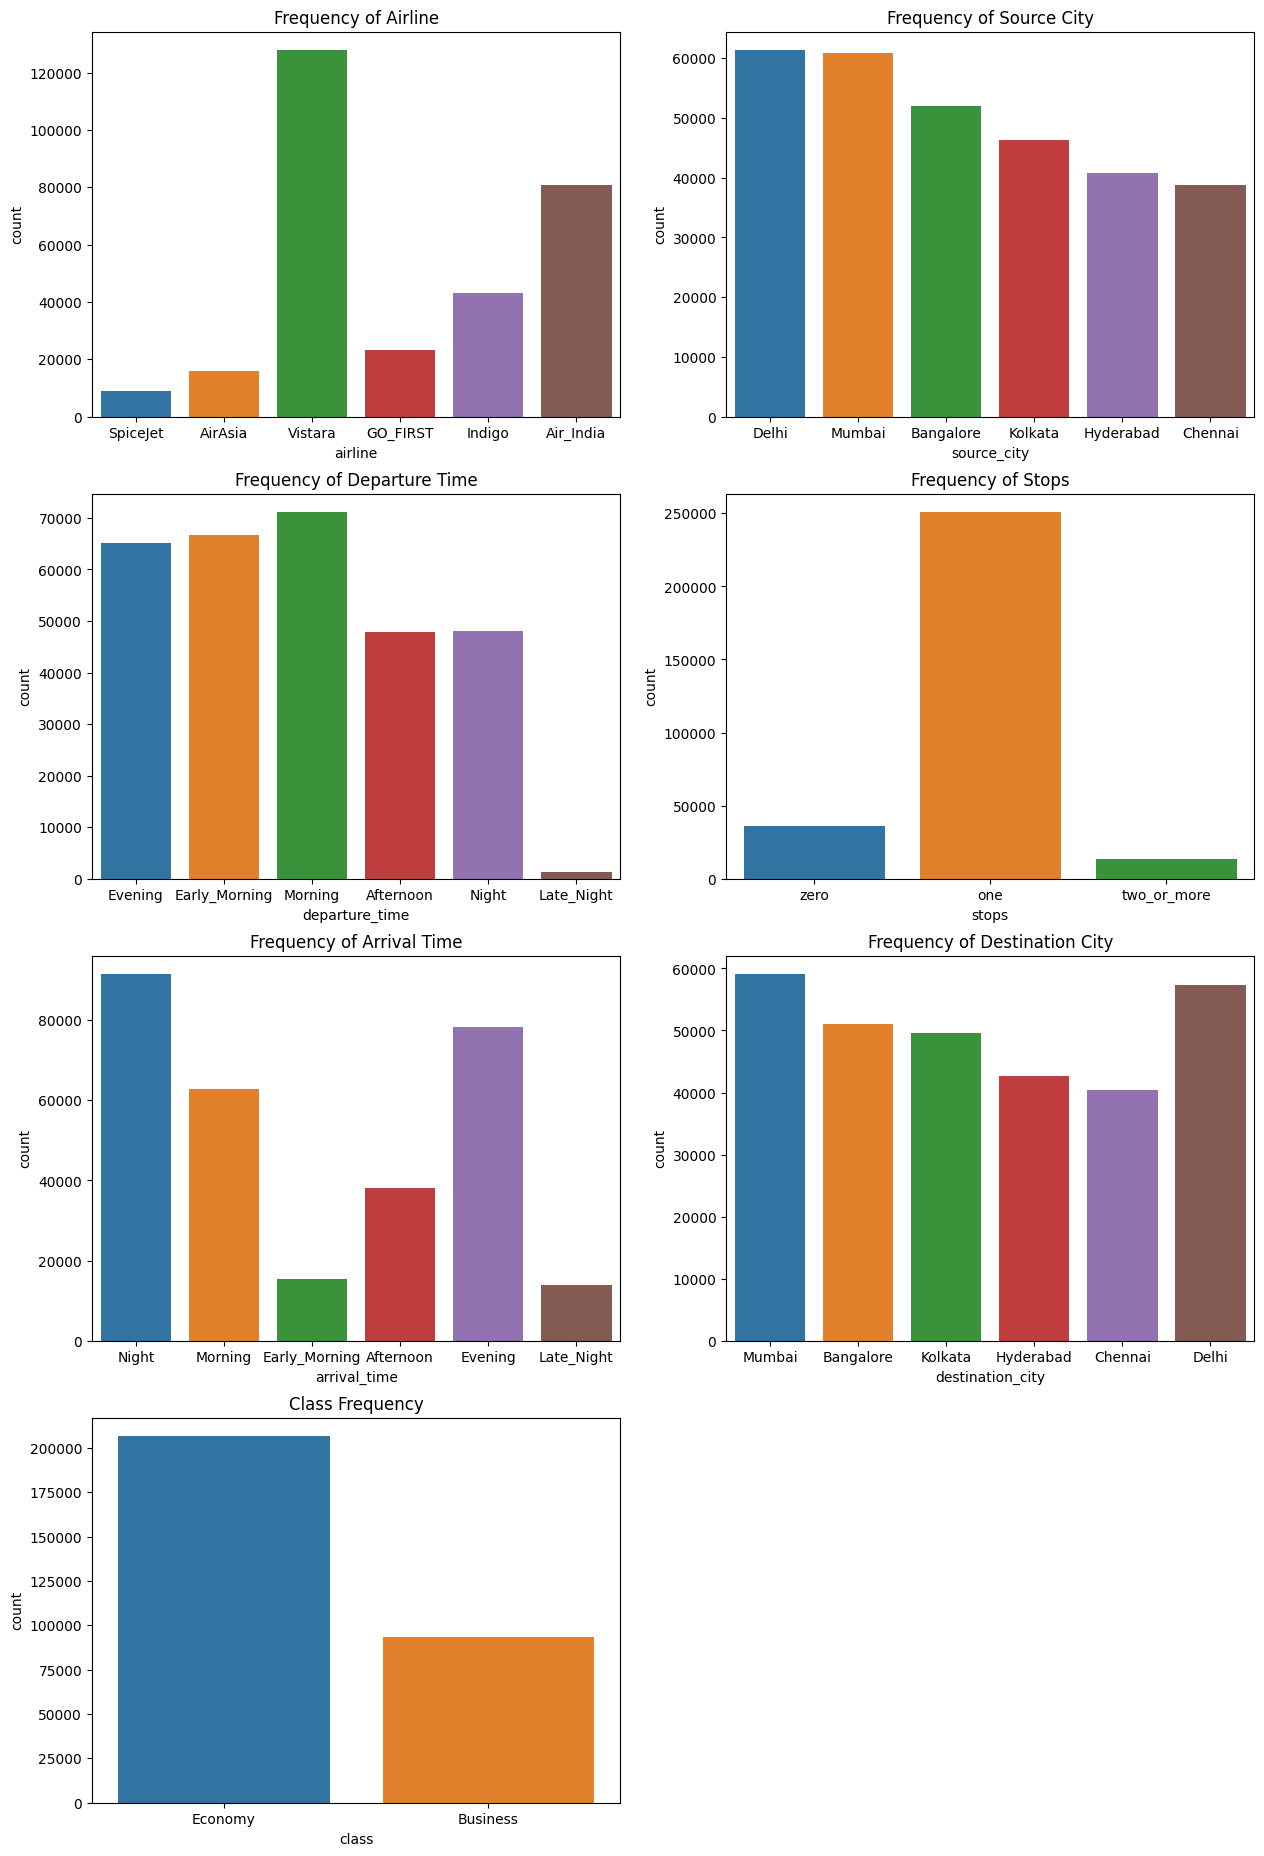

In [20]:
# Visualizations of categoric features with count plot

plt.figure(figsize = (15,23))

plt.subplot(4,2,1)
sns.countplot(x = df['airline'], data = df)
plt.title("Frequency of Airline")

plt.subplot(4,2,2)
sns.countplot(x = df['source_city'], data = df)
plt.title("Frequency of Source City")

plt.subplot(4,2,3)
sns.countplot(x = df['departure_time'], data = df)
plt.title("Frequency of Departure Time")

plt.subplot(4,2,4)
sns.countplot(x = df['stops'], data = df)
plt.title("Frequency of Stops")

plt.subplot(4,2,5)
sns.countplot(x = df['arrival_time'], data = df)
plt.title("Frequency of Arrival Time")

plt.subplot(4,2,6)
sns.countplot(x = df['destination_city'], data = df)
plt.title("Frequency of Destination City")

plt.subplot(4,2,7)
sns.countplot(x = df['class'], data = df)
plt.title("Class Frequency")

plt.show()

<ipython-input-21-9612829092fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


<Axes: >

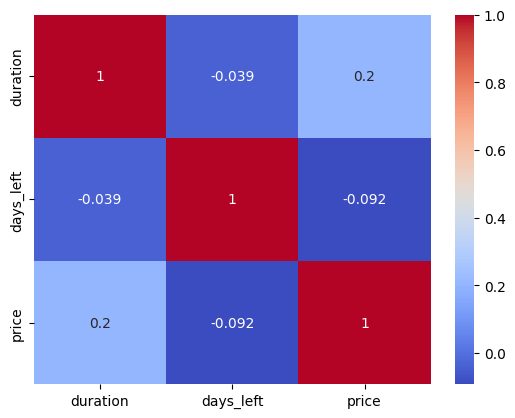

In [21]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [22]:
df['stops'] = df['stops'].replace(['zero', 'one', 'two_or_more'], [0,1,2])

<ipython-input-23-9612829092fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


<Axes: >

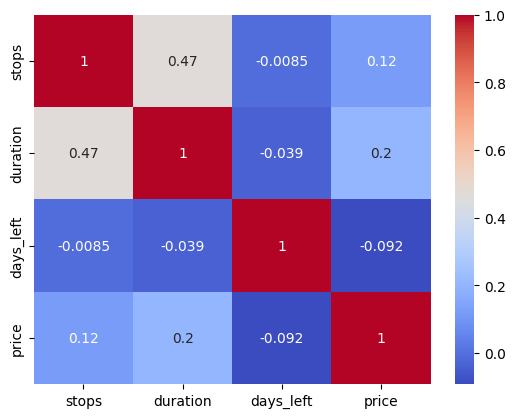

In [23]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


In [26]:
df = df.drop(columns = ['flight'])

In [27]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,0,5,5,1,2.17,1,5953
1,4,2,1,0,4,5,1,2.33,1,5953
2,0,2,1,0,1,5,1,2.17,1,5956
3,5,2,4,0,0,5,1,2.25,1,5955
4,5,2,4,0,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,1,2,3,0,10.08,49,69265
300149,5,1,0,1,5,3,0,10.42,49,77105
300150,5,1,1,1,5,3,0,13.83,49,79099
300151,5,1,1,1,2,3,0,10.00,49,81585


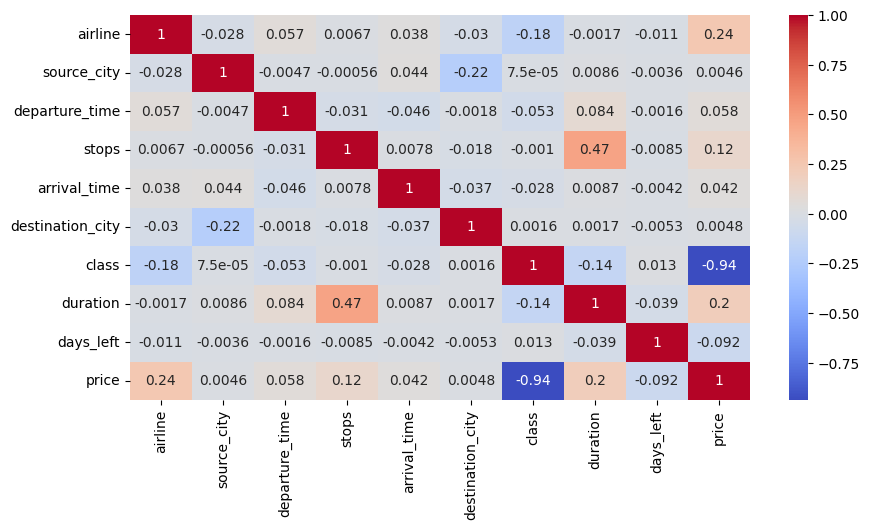

In [29]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
  if ((df[col].dtype != 'object') & (col != 'price')):
    col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.461766
1       source_city  2.933064
2    departure_time  2.746367
3             stops  7.464236
4      arrival_time  3.684695
5  destination_city  2.893218
6             class  2.917521
7          duration  5.037943
8         days_left  4.035735


In [31]:
df = df.drop(columns = ['stops'])

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
  if ((df[col].dtype != 'object') & (col != 'price')):
    col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


In [33]:
X = df.drop(columns = ['price'])
y = df['price']

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
lr = LinearRegression()

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
lr.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(x_test)

In [42]:
from sklearn.metrics import r2_score


In [43]:
r2_score (y_test, y_pred)

0.897752737512321

In [45]:
from sklearn import metrics

In [46]:
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)

In [47]:
mean_abs_error

4468.426673542113

In [48]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.34765804610681816

In [49]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

52706651.33334208

In [51]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [52]:
root_mean_sq_error


7259.934664536733

In [53]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
r2_score(y_test, y_pred)

0.9746705905205574

In [54]:
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

1216.5238238021466

In [55]:
mean_absolute_percentage_error(y_test, y_pred)

0.07754101881235446

In [56]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

13056861.58662006

In [57]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

3613.427955089192

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
r2_score(y_test, y_pred)

0.9845589668778341

In [59]:
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

1121.9425998563984

In [60]:
mean_absolute_percentage_error(y_test, y_pred)

0.0733015423264461

In [61]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

7959578.860066346

In [62]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

2821.272560400066